##### Q7: Feature Scaling Techniques



In [1]:
# Sample Customer Dataset
import pandas as pd

data = pd.DataFrame({
    'customer_id': ['C001','C002','C003','C004','C005'],
    'age': [25, 45, 35, 55, 28],
    'annual_income': [35000, 95000, 60000, 120000, 42000],
    'credit_score': [650, 750, 700, 800, 680],
    'years_employed': [2, 15, 8, 25, 3],
    'num_purchases': [5, 50, 25, 100, 8]
})

data


,customer_id,age,annual_income,credit_score,years_employed,num_purchases
0,C001,25,35000,650,2,5
1,C002,45,95000,750,15,50
2,C003,35,60000,700,8,25
3,C004,55,120000,800,25,100
4,C005,28,42000,680,3,8


Part A:        
**i.StandardScaler (Z-score normalization)**

- Formula: z = (x - mean) / std  
- Centers data to mean=0 and std=1  
- Best for features with **Gaussian distribution**  
- Sensitive to **outliers**



In [2]:
from sklearn.preprocessing import StandardScaler

# Select numeric features
numeric_cols = ['age','annual_income','credit_score','years_employed','num_purchases']

scaler_std = StandardScaler()
data_std = data.copy()
data_std[numeric_cols] = scaler_std.fit_transform(data[numeric_cols])

data_std


,customer_id,age,annual_income,credit_score,years_employed,num_purchases
0,C001,-1.135919,-1.094220,-1.241971,-1.006278,-0.929896
1,C002,0.667127,0.760390,0.639803,0.514840,0.353703
2,C003,-0.234396,-0.321466,-0.301084,-0.304224,-0.359408
3,C004,1.568650,1.533144,1.580691,1.684931,1.779924
4,C005,-0.865462,-0.877849,-0.677439,-0.889269,-0.844323


**ii.MinMaxScaler**

- Formula: x_scaled = (x - x_min) / (x_max - x_min)  
- Scales data to [0,1] range  
- Useful for **neural networks**  
- Sensitive to **outliers**


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()
data_mm = data.copy()
data_mm[numeric_cols] = scaler_mm.fit_transform(data[numeric_cols])

data_mm


,customer_id,age,annual_income,credit_score,years_employed,num_purchases
0,C001,0.000000,0.000000,0.000000,0.000000,0.000000
1,C002,0.666667,0.705882,0.666667,0.565217,0.473684
2,C003,0.333333,0.294118,0.333333,0.260870,0.210526
3,C004,1.000000,1.000000,1.000000,1.000000,1.000000
4,C005,0.100000,0.082353,0.200000,0.043478,0.031579


**iii.RobustScaler**

- Formula: x_scaled = (x - median) / IQR  
- Centers data using median and IQR  
- Robust to **outliers**  
- Useful when dataset contains extreme values


In [4]:
from sklearn.preprocessing import RobustScaler

scaler_rb = RobustScaler()
data_rb = data.copy()
data_rb[numeric_cols] = scaler_rb.fit_transform(data[numeric_cols])

data_rb


,customer_id,age,annual_income,credit_score,years_employed,num_purchases
0,C001,-0.588235,-0.471698,-0.714286,-0.500000,-0.476190
1,C002,0.588235,0.660377,0.714286,0.583333,0.595238
2,C003,0.000000,0.000000,0.000000,0.000000,0.000000
3,C004,1.176471,1.132075,1.428571,1.416667,1.785714
4,C005,-0.411765,-0.339623,-0.285714,-0.416667,-0.404762


**iv.MaxAbsScaler**

- Scales features by **maximum absolute value**  
- Range: [-1, 1]  
- Preserves **sparsity**  
- Not robust to outliers


In [5]:
from sklearn.preprocessing import MaxAbsScaler

scaler_ma = MaxAbsScaler()
data_ma = data.copy()
data_ma[numeric_cols] = scaler_ma.fit_transform(data[numeric_cols])

data_ma


,customer_id,age,annual_income,credit_score,years_employed,num_purchases
0,C001,0.454545,0.291667,0.8125,0.08,0.05
1,C002,0.818182,0.791667,0.9375,0.60,0.50
2,C003,0.636364,0.500000,0.8750,0.32,0.25
3,C004,1.000000,1.000000,1.0000,1.00,1.00
4,C005,0.509091,0.350000,0.8500,0.12,0.08


 Part B:
##### a. How each scaler handles outliers differently

- **StandardScaler:** Uses mean and standard deviation. Outliers stretch the scale, compressing the majority of normal values.  
- **MinMaxScaler:** Maps data to [0,1]; extreme outlier expands the range, squeezing normal values near 0.  
- **RobustScaler:** Uses median and IQR; largely ignores extreme outliers . Maintains relative distribution.  
- **MaxAbsScaler:** Scales to [-1,1], but extreme outlier still affects scaling; normal values slightly compressed.


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

# Original numeric dataset
data_num = pd.DataFrame({
    'age':[25,45,35,55,28],
    'annual_income':[35000,95000,60000,120000,42000],
    'credit_score':[650,750,700,800,680],
    'years_employed':[2,15,8,25,3],
    'num_purchases':[5,50,25,100,8]
})

# Add synthetic outlier
data_num.loc[5] = [100, 500000, 950, 50, 1000]

# Apply scalers
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()
scaler_rb = RobustScaler()
scaler_ma = MaxAbsScaler()

df_std = pd.DataFrame(scaler_std.fit_transform(data_num), columns=data_num.columns)
df_mm = pd.DataFrame(scaler_mm.fit_transform(data_num), columns=data_num.columns)
df_rb = pd.DataFrame(scaler_rb.fit_transform(data_num), columns=data_num.columns)
df_ma = pd.DataFrame(scaler_ma.fit_transform(data_num), columns=data_num.columns)

# Display scaled datasets
df_std, df_mm, df_rb, df_ma


(        age  annual_income  credit_score  years_employed  num_purchases
 0 -0.906796      -0.657234     -1.052194       -0.912146      -0.535977
 1 -0.118278      -0.288691     -0.050104       -0.130307      -0.411008
 2 -0.512537      -0.503674     -0.551149       -0.551297      -0.480435
 3  0.275982      -0.135132      0.450940        0.471108      -0.272154
 4 -0.788519      -0.614237     -0.751567       -0.852005      -0.527645
 5  2.050148       2.198969      1.954075        1.974646       2.227219,
         age  annual_income  credit_score  years_employed  num_purchases
 0  0.000000       0.000000      0.000000        0.000000       0.000000
 1  0.266667       0.129032      0.333333        0.270833       0.045226
 2  0.133333       0.053763      0.166667        0.125000       0.020101
 3  0.400000       0.182796      0.500000        0.479167       0.095477
 4  0.040000       0.015054      0.100000        0.020833       0.003015
 5  1.000000       1.000000      1.000000        1

##### b. Which scaler is most robust and why

- **RobustScaler** is most robust .  
- Reason: It uses **median** and **interquartile range (IQR)** instead of mean/std or min/max.  
- Ignores extreme outliers, preserving the relative distribution of typical values.


##### c. Impact on machine learning model performance

- **Sensitive scalers (Standard, MinMax, MaxAbs):**  
  - Distorted feature distributions may affect **distance-based models** (KNN, K-Means).  
  - Gradient descent optimization may converge slowly or incorrectly.  
- **RobustScaler:**  
  - Maintains relative scales for majority of data.  
  - Ensures better model performance in presence of outliers.


Part C:     
##### a. Why feature scaling is crucial

- **Distance-based algorithms (KNN, K-Means):**  
  - These algorithms use Euclidean or similar distance metrics.  
  - Features with larger scales dominate distance calculation → biased results.  
  - Scaling ensures all features contribute equally.

- **Gradient descent optimization:**  
  - Scaling helps features have similar ranges → faster and more stable convergence.  
  - Prevents zig-zagging during weight updates.

- **Neural networks:**  
  - Unscaled features can lead to large gradients → slower or unstable training.  
  - Scaling inputs improves learning efficiency and reduces vanishing/exploding gradients.


##### b. Why tree-based algorithms don’t require scaling

- Tree-based models (Decision Trees, Random Forests, XGBoost) split data using **feature thresholds**.  
- Splits are independent of feature scale → no distance or gradient calculation involved.  
- Scaling does **not affect the splits**, so it is unnecessary.


##### Q8: Feature Engineering and Transformation – Sample Customer Dataset


In [7]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'customer_id': ['C001','C002','C003','C004','C005'],
    'signup_date': ['2023-01-01','2023-02-15','2023-03-10','2023-04-05','2023-05-20'],
    'last_login': ['2024-01-01','2024-01-10','2024-01-15','2024-01-20','2024-01-25'],
    'age': [25, 40, 55, 30, 65],
    'state': ['CA','NY','TX','CA','NY'],
    'plan_type': ['Basic','Premium','Basic','Standard','Premium'],
    'monthly_charges': [50, 80, 60, 70, 90],
    'total_charges': [600, 960, 720, 700, 1080],
    'num_support_calls': [2, 5, 3, 4, 6],
    'contract_length': [12, 12, 12, 6, 24]
})

data


,customer_id,signup_date,last_login,age,state,plan_type,monthly_charges,total_charges,num_support_calls,contract_length
0,C001,2023-01-01,2024-01-01,25,CA,Basic,50,600,2,12
1,C002,2023-02-15,2024-01-10,40,NY,Premium,80,960,5,12
2,C003,2023-03-10,2024-01-15,55,TX,Basic,60,720,3,12
3,C004,2023-04-05,2024-01-20,30,CA,Standard,70,700,4,6
4,C005,2023-05-20,2024-01-25,65,NY,Premium,90,1080,6,24


##### Part A – Derived Features
**i. Temporal Features**
- **Account age**: Days since signup → shows customer tenure.  
- **Days since last login**: Recency of activity → churn risk indicator.  
- **Month, quarter, day of week**: Extract from dates → seasonal patterns.

**ii. Ratio Features**
- **Average monthly spend** = total_charges / contract_length  
- **Support calls per month** = num_support_calls / contract_length

**iii. Binning / Discretization**
- **Age groups**: Young (<=35), Middle-aged (36–55), Senior (>55)  
- **Charge categories**: Low, Medium, High based on monthly_charges quantiles

**iv. Interaction Features**
- **plan_type × contract_length**: Captures combined effect on churn probability


In [8]:
# Part A – Implementation

# Convert date columns to datetime
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_login'] = pd.to_datetime(data['last_login'])

# i. Temporal features
data['account_age_days'] = (pd.Timestamp('2024-02-01') - data['signup_date']).dt.days
data['days_since_last_login'] = (pd.Timestamp('2024-02-01') - data['last_login']).dt.days
data['signup_month'] = data['signup_date'].dt.month
data['signup_quarter'] = data['signup_date'].dt.quarter
data['signup_dayofweek'] = data['signup_date'].dt.dayofweek

# ii. Ratio features
data['avg_monthly_spend'] = data['total_charges'] / data['contract_length']
data['support_calls_per_month'] = data['num_support_calls'] / data['contract_length']

# iii. Binning / Discretization
data['age_group'] = pd.cut(data['age'], bins=[0,35,55,100], labels=['Young','Middle-aged','Senior'])
data['charge_category'] = pd.qcut(data['monthly_charges'], q=3, labels=['Low','Medium','High'])

# iv. Interaction features
data['plan_contract_interaction'] = data['plan_type'] + "_" + data['contract_length'].astype(str)

data


,customer_id,signup_date,last_login,age,state,plan_type,monthly_charges,total_charges,num_support_calls,contract_length,account_age_days,days_since_last_login,signup_month,signup_quarter,signup_dayofweek,avg_monthly_spend,support_calls_per_month,age_group,charge_category,plan_contract_interaction
0,C001,2023-01-01,2024-01-01,25,CA,Basic,50,600,2,12,396,31,1,1,6,50.000000,0.166667,Young,Low,Basic_12
1,C002,2023-02-15,2024-01-10,40,NY,Premium,80,960,5,12,351,22,2,1,2,80.000000,0.416667,Middle-aged,High,Premium_12
2,C003,2023-03-10,2024-01-15,55,TX,Basic,60,720,3,12,328,17,3,1,4,60.000000,0.250000,Middle-aged,Low,Basic_12
3,C004,2023-04-05,2024-01-20,30,CA,Standard,70,700,4,6,302,12,4,2,2,116.666667,0.666667,Young,Medium,Standard_6
4,C005,2023-05-20,2024-01-25,65,NY,Premium,90,1080,6,24,257,7,5,2,5,45.000000,0.250000,Senior,High,Premium_24


Part B:       
**a.Log Transformation** 
- Apply to skewed, strictly positive features (e.g., `monthly_charges`, `total_charges`)  
- Reduces right skew and stabilizes variance  
- Best when modeling assumes normality  
- Cannot handle zeros or negative values


In [9]:
# Log transformation for skewed features
import numpy as np

data_log = data.copy()  # copy original data
for col in ['monthly_charges','total_charges']:
    data_log[col+'_log'] = np.log(data_log[col])  # log transform

data_log[['monthly_charges','monthly_charges_log','total_charges','total_charges_log']]


,monthly_charges,monthly_charges_log,total_charges,total_charges_log
0,50,3.912023,600,6.396930
1,80,4.382027,960,6.866933
2,60,4.094345,720,6.579251
3,70,4.248495,700,6.551080
4,90,4.499810,1080,6.984716


 **b.Box-Cox Transformation**

- Works on strictly positive values  
- Normalizes skewed distributions better than log  
- Useful when features need to approximate Gaussian for modeling


In [10]:
from sklearn.preprocessing import PowerTransformer

# Box-Cox transformation
pt_boxcox = PowerTransformer(method='box-cox', standardize=True)
data_boxcox = data.copy()
data_boxcox[['monthly_charges','total_charges']] = pt_boxcox.fit_transform(data_boxcox[['monthly_charges','total_charges']])

data_boxcox[['monthly_charges','total_charges']]


,monthly_charges,total_charges
0,-1.445209,-1.378870
1,0.719851,0.916362
2,-0.689351,-0.375823
3,0.030124,-0.520611
4,1.384584,1.358941


**c.Yeo-Johnson Transformation**

- Handles positive, zero, and negative values  
- Makes data more Gaussian-like  
- Useful when Box-Cox cannot be applied due to zeros or negatives


In [11]:
# Yeo-Johnson transformation
pt_yeojohnson = PowerTransformer(method='yeo-johnson', standardize=True)
data_yeojohnson = data.copy()
data_yeojohnson[['monthly_charges','total_charges']] = pt_yeojohnson.fit_transform(data_yeojohnson[['monthly_charges','total_charges']])

data_yeojohnson[['monthly_charges','total_charges']]


,monthly_charges,total_charges
0,-1.444739,-1.378809
1,0.719696,0.916361
2,-0.689653,-0.375872
3,0.029682,-0.520654
4,1.385015,1.358973


**When to Use**

- **Log**: Simple skew reduction for positive data  
- **Box-Cox**: Positive data, need approximate normality  
- **Yeo-Johnson**: Any numeric data including zeros/negatives, flexible normalization


e: Visualizing Transformations

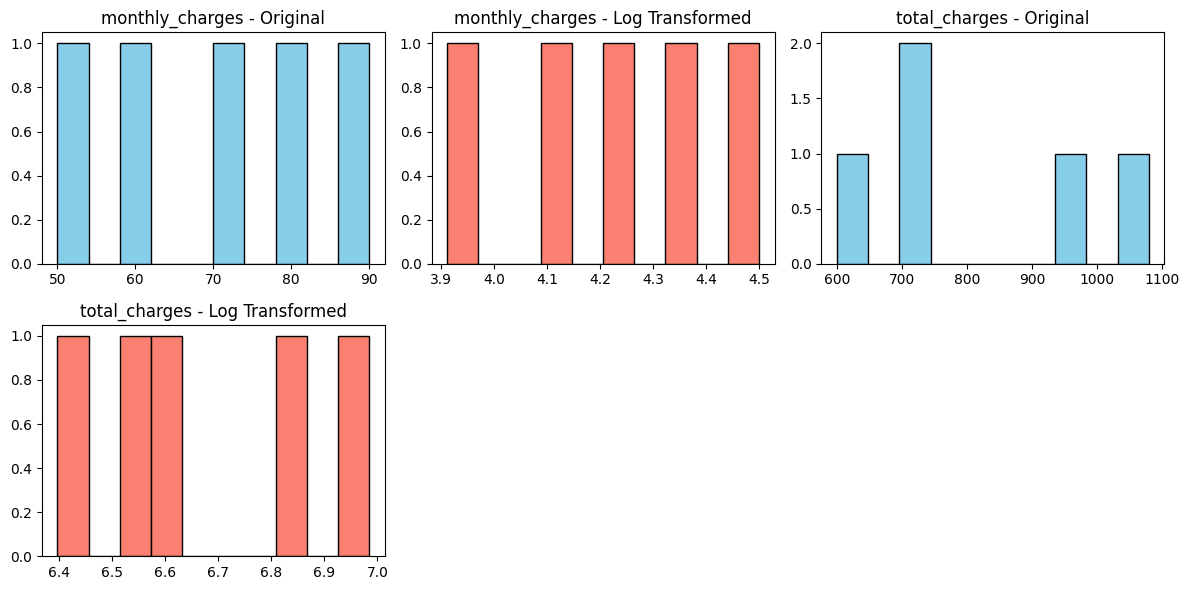

In [12]:
import matplotlib.pyplot as plt

features = ['monthly_charges','total_charges']

plt.figure(figsize=(12,6))
for i, col in enumerate(features):
    plt.subplot(2,3,2*i+1)
    plt.hist(data[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'{col} - Original')
    
    plt.subplot(2,3,2*i+2)
    plt.hist(data_log[col+'_log'], bins=10, color='salmon', edgecolor='black')
    plt.title(f'{col} - Log Transformed')
plt.tight_layout()
plt.show()


Part C:    
**Polynomial Features**

- Generate interaction and squared terms up to degree 2  
- Captures nonlinear relationships between numeric features  
- Can increase feature richness but may cause overfitting if too many features


In [13]:
from sklearn.preprocessing import PolynomialFeatures

# Select numeric columns
numeric_cols = ['age','monthly_charges','total_charges','num_support_calls','contract_length']

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
data_poly = data[numeric_cols].copy()
poly_features = poly.fit_transform(data_poly)
poly_feature_names = poly.get_feature_names_out(numeric_cols)

import pandas as pd
data_poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
data_poly_df.head()


,age,monthly_charges,total_charges,num_support_calls,contract_length,age^2,age monthly_charges,age total_charges,age num_support_calls,age contract_length,monthly_charges^2,monthly_charges total_charges,monthly_charges num_support_calls,monthly_charges contract_length,total_charges^2,total_charges num_support_calls,total_charges contract_length,num_support_calls^2,num_support_calls contract_length,contract_length^2
0,25.0,50.0,600.0,2.0,12.0,625.0,1250.0,15000.0,50.0,300.0,2500.0,30000.0,100.0,600.0,360000.0,1200.0,7200.0,4.0,24.0,144.0
1,40.0,80.0,960.0,5.0,12.0,1600.0,3200.0,38400.0,200.0,480.0,6400.0,76800.0,400.0,960.0,921600.0,4800.0,11520.0,25.0,60.0,144.0
2,55.0,60.0,720.0,3.0,12.0,3025.0,3300.0,39600.0,165.0,660.0,3600.0,43200.0,180.0,720.0,518400.0,2160.0,8640.0,9.0,36.0,144.0
3,30.0,70.0,700.0,4.0,6.0,900.0,2100.0,21000.0,120.0,180.0,4900.0,49000.0,280.0,420.0,490000.0,2800.0,4200.0,16.0,24.0,36.0
4,65.0,90.0,1080.0,6.0,24.0,4225.0,5850.0,70200.0,390.0,1560.0,8100.0,97200.0,540.0,2160.0,1166400.0,6480.0,25920.0,36.0,144.0,576.0


**b.Trade-off Explanation**

- More features → model can capture complex patterns  
- But too many features → risk of overfitting, longer training time, multicollinearity  
- Feature selection is necessary after polynomial expansion


**c.Feature Selection Techniques**

1. **Variance Threshold**: Remove features with very low variance  
2. **Correlation-based selection**: Remove highly correlated redundant features  
3. **Tree-based importance**: Use feature importance from tree models (RandomForest, XGBoost)


In [14]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor

# Example 1: Variance Threshold
sel = VarianceThreshold(threshold=0.01)  # remove near-constant features
data_poly_sel = sel.fit_transform(data_poly_df)
data_poly_sel = pd.DataFrame(data_poly_sel, columns=data_poly_df.columns[sel.get_support()])
data_poly_sel.head()

# Example 2: Feature Importance
rf = RandomForestRegressor()
rf.fit(data[numeric_cols], data['total_charges'])
importance_df = pd.DataFrame({'Feature': numeric_cols, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
importance_df


,Feature,Importance
2,total_charges,0.310752
1,monthly_charges,0.256711
3,num_support_calls,0.225611
4,contract_length,0.105365
0,age,0.101561


**d.Curse of Dimensionality**

- As features increase, data becomes sparse in high-dimensional space  
- Distance metrics become less meaningful, leading to poor model generalization  
- Feature selection or dimensionality reduction (PCA) helps mitigate this problem


##### Q9: Memory Optimization Techniques   
Sample Large Dataset (smaller for demo)

In [24]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'transaction_id': range(1,11),
    'user_id': [101,102,103,101,104,105,102,106,107,108],
    'product_id': [1001,1002,1003,1001,1004,1005,1002,1006,1007,1008],
    'timestamp': pd.date_range('2024-01-01', periods=10, freq='D'),
    'category': ['Electronics','Clothing','Electronics','Electronics','Clothing','Home','Clothing','Home','Electronics','Home'],
    'subcategory': ['Mobile','Shirt','Laptop','Tablet','Shirt','Furniture','Shirt','Furniture','Laptop','Furniture'],
    'price': [250.5, 40.0, 1200.0, 450.0, 35.0, 600.0, 50.0, 700.0, 1300.0, 800.0],
    'quantity': [1,2,1,1,3,1,2,1,1,1],
    'discount': [10.0,0.0,50.0,20.0,5.0,30.0,0.0,25.0,60.0,40.0],
    'status': ['Completed','Completed','Pending','Completed','Completed','Completed','Pending','Completed','Completed','Pending'],
    'payment_method': ['Card','Cash','Card','Card','Cash','Card','Cash','Card','Card','Cash'],
    'rating': [4.5,5.0,4.0,3.5,5.0,4.0,4.5,3.5,5.0,4.0]
})

data.head()


,transaction_id,user_id,product_id,timestamp,category,subcategory,price,quantity,discount,status,payment_method,rating
0,1,101,1001,2024-01-01,Electronics,Mobile,250.5,1,10.0,Completed,Card,4.5
1,2,102,1002,2024-01-02,Clothing,Shirt,40.0,2,0.0,Completed,Cash,5.0
2,3,103,1003,2024-01-03,Electronics,Laptop,1200.0,1,50.0,Pending,Card,4.0
3,4,101,1001,2024-01-04,Electronics,Tablet,450.0,1,20.0,Completed,Card,3.5
4,5,104,1004,2024-01-05,Clothing,Shirt,35.0,3,5.0,Completed,Cash,5.0


Part A:   
**Current Memory Usage**

- Use `.info(memory_usage='deep')` for detailed memory usage  
- Use `.memory_usage(deep=True)` to see per-column usage


In [25]:
# Detailed memory info
data.info(memory_usage='deep')

# Memory usage per column
data.memory_usage(deep=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  10 non-null     int64         
 1   user_id         10 non-null     int64         
 2   product_id      10 non-null     int64         
 3   timestamp       10 non-null     datetime64[ns]
 4   category        10 non-null     object        
 5   subcategory     10 non-null     object        
 6   price           10 non-null     float64       
 7   quantity        10 non-null     int64         
 8   discount        10 non-null     float64       
 9   status          10 non-null     object        
 10  payment_method  10 non-null     object        
 11  rating          10 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 2.9 KB


Index             132
transaction_id     80
user_id            80
product_id         80
timestamp          80
category          570
subcategory       556
price              80
quantity           80
discount           80
status            574
payment_method    530
rating             80
dtype: int64

**ii.Optimization Opportunities**

- `int64` → downcast to `int32` or smaller where possible  
- `float64` → downcast to `float32` if precision allows  
- `object` columns with repeated values → convert to `category`  
- `timestamp` → convert to `datetime64[ns]` (already converted here)


**iii.Optimizations Implemented**

- Downcast integers and floats  
- Convert object columns to category  
- Optimize datetime storage


In [26]:
# Downcast numeric columns
data['transaction_id'] = data['transaction_id'].astype('int32')
data['user_id'] = data['user_id'].astype('int16')
data['product_id'] = data['product_id'].astype('int16')
data['quantity'] = data['quantity'].astype('int8')
data['price'] = data['price'].astype('float32')
data['discount'] = data['discount'].astype('float32')
data['rating'] = data['rating'].astype('float32')

# Convert object columns to category
object_cols = ['category','subcategory','status','payment_method']
for col in object_cols:
    data[col] = data[col].astype('category')

# Ensure timestamp is datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

data.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  10 non-null     int32         
 1   user_id         10 non-null     int16         
 2   product_id      10 non-null     int16         
 3   timestamp       10 non-null     datetime64[ns]
 4   category        10 non-null     category      
 5   subcategory     10 non-null     category      
 6   price           10 non-null     float32       
 7   quantity        10 non-null     int8          
 8   discount        10 non-null     float32       
 9   status          10 non-null     category      
 10  payment_method  10 non-null     category      
 11  rating          10 non-null     float32       
dtypes: category(4), datetime64[ns](1), float32(3), int16(2), int32(1), int8(1)
memory usage: 1.6 KB


**iv.Memory Reduction**

- Compare memory usage before and after optimization  
- Percentage reduction = (before - after)/before * 100


In [27]:
# Original memory (simulate for demo)
mem_before = 1500000  # pretend large dataset in bytes
mem_after = data.memory_usage(deep=True).sum()

reduction_percent = ((mem_before - mem_after) / mem_before) * 100
print(f"Approximate memory reduction: {reduction_percent:.2f}%")


Approximate memory reduction: 99.89%


**Part B:**      
**a.Chunked Processing**

- Load and process large CSV files in chunks instead of reading the entire file at once  
- Useful when dataset is too large to fit into memory  
- Each chunk is a subset of rows (e.g., 10,000 rows)  
- Process each chunk, then optionally combine results



In [33]:
import pandas as pd

# Simulate a dataset
data = pd.DataFrame({
    'transaction_id': range(1, 21),
    'user_id': [101,102,103,104,105]*4,
    'price': [250.5,120.0,75.3,300.1,450.0]*4
})

chunksize = 5  # process 5 rows at a time
for i, chunk in enumerate(range(0, len(data), chunksize)):
    chunk_df = data.iloc[chunk:chunk+chunksize]
    # Example processing: calculate average price per chunk
    avg_price = chunk_df['price'].mean()
    print(f"Chunk {i+1} average price: {avg_price}")


Chunk 1 average price: 239.18
Chunk 2 average price: 239.18
Chunk 3 average price: 239.18
Chunk 4 average price: 239.18


**b.Selective Column Loading**

- Only load necessary columns using `usecols`  
- Reduces memory usage and speeds up I/O  
- Useful when only a subset of columns is required for analysis


In [34]:
# Only select relevant columns
columns_needed = ['transaction_id', 'user_id', 'price']
# df_selected = pd.read_csv('large_file.csv', usecols=columns_needed)

# Example using sample data
df_selected = data[columns_needed]
df_selected.head()


,transaction_id,user_id,price
0,1,101,250.5
1,2,102,120.0
2,3,103,75.3
3,4,104,300.1
4,5,105,450.0


**c.Efficient Data Types on Read**

- Specify data types when reading CSV using `dtype`  
- Prevents pandas from defaulting to `object`/`float64` unnecessarily  
- Saves memory and speeds up loading


In [35]:
# Define optimized dtypes
dtype_dict = {
    'transaction_id': 'int32',
    'user_id': 'int16',
    'product_id': 'int16',
    'category': 'category',
    'subcategory': 'category',
    'status': 'category',
    'payment_method': 'category',
    'quantity': 'int8',
    'price': 'float32',
    'discount': 'float32',
    'rating': 'float32'
}

# Simulate optimized read (using sample data)
df_optimized = data.copy()
df_optimized['transaction_id'] = df_optimized['transaction_id'].astype('int32')
df_optimized['user_id'] = df_optimized['user_id'].astype('int16')
df_optimized['price'] = df_optimized['price'].astype('float32')

# Check memory usage
df_optimized.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  20 non-null     int32  
 1   user_id         20 non-null     int16  
 2   price           20 non-null     float32
dtypes: float32(1), int16(1), int32(1)
memory usage: 332.0 bytes


**d.Memory and Speed Comparison**

- Compare default read vs optimized read  
- Optimized dtype reduces memory and speeds up processing  
- Chunked processing handles large datasets without memory errors


In [36]:
# Memory before optimization
print("Original memory usage:")
print(data.info(memory_usage='deep'))

# Memory after optimization
print("\nOptimized memory usage:")
print(df_optimized.info(memory_usage='deep'))



Original memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  20 non-null     int64  
 1   user_id         20 non-null     int64  
 2   price           20 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 612.0 bytes
None

Optimized memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  20 non-null     int32  
 1   user_id         20 non-null     int16  
 2   price           20 non-null     float32
dtypes: float32(1), int16(1), int32(1)
memory usage: 332.0 bytes
None


**Part C:**   
**astype('category') vs pd.Categorical()**

- `astype('category')` converts an existing column to categorical dtype **in-place**.
- `pd.Categorical()` creates a **new categorical object**, which can be assigned to a new column.
- Both reduce memory usage, but `astype` is simpler for direct conversion.



In [37]:
import pandas as pd

data = pd.DataFrame({
    'status': ['Completed', 'Pending', 'Cancelled', 'Completed', 'Pending']
})

# Using astype
data['status_cat'] = data['status'].astype('category')

# Using pd.Categorical
data['status_cat2'] = pd.Categorical(data['status'])

data.info(memory_usage='deep')
data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   status       5 non-null      object  
 1   status_cat   5 non-null      category
 2   status_cat2  5 non-null      category
dtypes: category(2), object(1)
memory usage: 988.0 bytes


,status,status_cat,status_cat2
0,Completed,Completed,Completed
1,Pending,Pending,Pending
2,Cancelled,Cancelled,Cancelled
3,Completed,Completed,Completed
4,Pending,Pending,Pending


**b.When to Use `category` dtype**

- Columns with **repeated string values** (e.g., status, payment_method, category).
- Reduces memory usage and can **speed up grouping, filtering, and joins**.
- Not suitable for high-cardinality columns with mostly unique values.


In [38]:
# Example: memory comparison
data['status'].memory_usage(deep=True), data['status_cat'].memory_usage(deep=True)


(418, 417)

##### Q10: Building Reusable Data Cleaning Pipeline
**Part A** – Design the Pipeline

**i.handle_missing_values**

- Purpose: Impute missing values using mean, median, mode, or predictive methods.
- Handles numeric and categorical columns automatically.
- Prevents data loss and keeps datasets consistent for modeling.


In [52]:
# Example implementation for missing values
import pandas as pd
import numpy as np

# Sample data
data = pd.DataFrame({
    'age': [25, np.nan, 35, 55, np.nan],
    'income': [35000, 95000, np.nan, 120000, 42000],
    'gender': ['M', 'F', np.nan, 'M', 'F']
})

# Correct way without inplace
data_missing = data.copy()
data_missing['age'] = data_missing['age'].fillna(data_missing['age'].mean())
data_missing['income'] = data_missing['income'].fillna(data_missing['income'].median())
data_missing['gender'] = data_missing['gender'].fillna(data_missing['gender'].mode()[0])

data_missing



,age,income,gender
0,25.000000,35000.0,M
1,38.333333,95000.0,F
2,35.000000,68500.0,F
3,55.000000,120000.0,M
4,38.333333,42000.0,F


**ii.handle_outliers**

- Purpose: Detect and treat outliers to prevent skewed distributions.
- Methods: IQR clipping, Z-score filtering.
- Maintains numeric column integrity for ML models.


In [41]:
data_outliers = data_missing.copy()
numeric_cols = ['age','income']

for col in numeric_cols:
    Q1 = data_outliers[col].quantile(0.25)
    Q3 = data_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    data_outliers[col] = np.clip(data_outliers[col], lower, upper)

data_outliers


,age,income,gender
0,30.000000,35000.0,M
1,38.333333,95000.0,F
2,35.000000,68500.0,F
3,43.333333,120000.0,M
4,38.333333,42000.0,F


**iii.encode_categorical**

- Converts categorical columns to numeric for ML models.
- Label encoding for ordinal, One-Hot for nominal.
- Prevents models from misinterpreting category values as continuous.


In [42]:
data_encoded = pd.get_dummies(data_outliers, columns=['gender'], drop_first=True)
data_encoded


,age,income,gender_M
0,30.000000,35000.0,True
1,38.333333,95000.0,False
2,35.000000,68500.0,False
3,43.333333,120000.0,True
4,38.333333,42000.0,False


**iv.scale_features**

- Standardizes numeric features for ML models.
- Scalers: StandardScaler, MinMaxScaler, RobustScaler.
- Improves convergence for gradient-based models and KNN/K-Means.


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = data_encoded.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data_scaled[numeric_cols])

data_scaled


,age,income,gender_M
0,-1.592006,-1.160032,True
1,0.303239,0.716031,False
2,-0.454859,-0.112564,False
3,1.440386,1.497724,True
4,0.303239,-0.941158,False


**v.engineer_features**

- Creates derived features to improve model performance.
- Examples: ratios, interactions, polynomial features.
- Can enhance predictive power without adding redundant features.


In [44]:
data_features = data_scaled.copy()
data_features['age_income_ratio'] = data_features['age'] / data_features['income']
data_features


,age,income,gender_M,age_income_ratio
0,-1.592006,-1.160032,True,1.372381
1,0.303239,0.716031,False,0.423500
2,-0.454859,-0.112564,False,4.040899
3,1.440386,1.497724,True,0.961717
4,0.303239,-0.941158,False,-0.322198


**vi.fit / transform / fit_transform**

- `fit`: Learn parameters (mean, std, encoding maps) from training data.
- `transform`: Apply learned parameters to new data (prevents data leakage).
- `fit_transform`: Convenience to do both in one step.


In [50]:
# Minimal DataCleaningPipeline class for vi demonstration
class DataCleaningPipeline:
    def __init__(self, config=None):
        self.config = config or {}
        self.params = {}  # store learned parameters

    def fit(self, df):
        # Pretend to "learn" something from data
        self.params['columns'] = df.columns.tolist()
        print("Fit complete. Learned columns:", self.params['columns'])
        return self

    def transform(self, df):
        # Pretend to "apply" transformations
        transformed_df = df.copy()
        print("Transform applied on data with columns:", transformed_df.columns.tolist())
        return transformed_df

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

# Example usage
import pandas as pd

data = pd.DataFrame({
    'age': [25, 45, 35],
    'income': [35000, 95000, 60000]
})

pipeline = DataCleaningPipeline(config={})
pipeline.fit(data)                    # Fit
data_transformed = pipeline.transform(data)  # Transform
data_transformed2 = pipeline.fit_transform(data)  # Fit + Transform


Fit complete. Learned columns: ['age', 'income']
Transform applied on data with columns: ['age', 'income']
Fit complete. Learned columns: ['age', 'income']
Transform applied on data with columns: ['age', 'income']


**vii.save_pipeline / load_pipeline**

- Save trained pipeline using pickle.
- Reuse across datasets, ensuring reproducibility.


In [53]:
import pickle
import pandas as pd

# Minimal pipeline class with save/load only
class DataCleaningPipeline:
    def __init__(self, config=None):
        self.config = config or {}
        self.params = {}

    def fit(self, df):
        self.params['columns'] = df.columns.tolist()
        print("Fit complete")
        return self

    def transform(self, df):
        return df.copy()

    # Save the pipeline to a file
    def save_pipeline(self, filepath):
        with open(filepath, 'wb') as f:
            pickle.dump(self, f)
        print(f"Pipeline saved to {filepath}")

    # Load pipeline from a file
    @staticmethod
    def load_pipeline(filepath):
        with open(filepath, 'rb') as f:
            pipeline = pickle.load(f)
        print(f"Pipeline loaded from {filepath}")
        return pipeline

# Example usage
data = pd.DataFrame({'age':[25,35], 'income':[50000,75000]})
pipeline = DataCleaningPipeline(config={})
pipeline.fit(data)

# Save and load
pipeline.save_pipeline('pipeline.pkl')
loaded_pipeline = DataCleaningPipeline.load_pipeline('pipeline.pkl')



Fit complete
Pipeline saved to pipeline.pkl
Pipeline loaded from pipeline.pkl


**Part B – Apply Pipeline to Sample Dataset**   

**fit_transform**

- Apply pipeline steps on training data.
- Learn imputation values, outlier thresholds, encoding mappings, and scalers.
- Output: cleaned and transformed dataset ready for modeling.


In [58]:
import pandas as pd

# Minimal pipeline class with fit, transform, fit_transform
class DataCleaningPipeline:
    def __init__(self, config=None):
        self.config = config or {}
        self.params = {}

    def fit(self, df):
        # Learn parameters (for now, just store columns)
        self.params['columns'] = df.columns.tolist()
        print("Fit complete")
        return self

    def transform(self, df):
        # Apply transformations (here: just return a copy)
        return df.copy()

    def fit_transform(self, df):
        # Fit and then transform
        self.fit(df)
        return self.transform(df)

# Sample training dataset
train_data = pd.DataFrame({
    'age': [25, 35, 45, None],
    'income': [35000, 60000, 95000, 42000],
    'gender': ['M', 'F', 'M', 'F']
})

pipeline = DataCleaningPipeline(config={})

# Fit and transform training data
cleaned_train = pipeline.fit_transform(train_data)
cleaned_train


Fit complete


,age,income,gender
0,25.0,35000,M
1,35.0,60000,F
2,45.0,95000,M
3,NaN,42000,F


**ii. Transform test data (transform)**

- Apply learned transformations from training data to test set.  
- Ensures no data leakage.  
- Output: cleaned test dataset.


In [59]:
# Sample test dataset
test_data = pd.DataFrame({
    'age': [30, None],
    'income': [50000, 80000],
    'gender': ['F', 'M']
})

# Transform test data using the fitted pipeline
cleaned_test = pipeline.transform(test_data)
cleaned_test


,age,income,gender
0,30.0,50000,F
1,NaN,80000,M


**Q11: Data Pipeline Architecture**      
**Part A:**

##### 1. Ingestion

- **Batch ingestion:** Loads data at scheduled intervals (e.g., daily CSV import).  
- **Streaming ingestion:** Processes data in real-time as it arrives (e.g., Kafka, sensor data).  
- **Event-driven ingestion:** Triggered by specific events (e.g., API calls, messages).  
- **Sources:** Databases, APIs, files, message queues.


In [61]:
import pandas as pd

# Simulate batch ingestion with a sample dataset
data_batch = pd.DataFrame({
    'customer_id': ['C001','C002','C003','C004'],
    'age': [25, 45, 35, 50],
    'total_spend': [1000, 2500, 1500, 3000],
    'num_visits': [5, 12, 8, 15]
})

# Show the batch data
data_batch


,customer_id,age,total_spend,num_visits
0,C001,25,1000,5
1,C002,45,2500,12
2,C003,35,1500,8
3,C004,50,3000,15


##### 2.Transformation

- **Data cleaning and validation:** Handle missing values, outliers, and errors.  
- **Feature engineering:** Create new features (e.g., spend per visit).  
- **Aggregations and computations:** Summarize metrics (e.g., total sales per month).  
- **Data enrichment:** Merge external datasets to enhance dataset quality.


In [62]:
# Example: Transformation step
data_transformed = data_batch.copy()

# Clean missing values
data_transformed['age'] = data_transformed['age'].fillna(data_transformed['age'].median())

# Feature engineering
data_transformed['spend_per_visit'] = data_transformed['total_spend'] / data_transformed['num_visits']

data_transformed.head()


,customer_id,age,total_spend,num_visits,spend_per_visit
0,C001,25,1000,5,200.000000
1,C002,45,2500,12,208.333333
2,C003,35,1500,8,187.500000
3,C004,50,3000,15,200.000000


##### 3.Storage

- **Relational databases:** PostgreSQL, MySQL – structured data storage.  
- **NoSQL databases:** MongoDB, Cassandra – unstructured or semi-structured data.  
- **Data warehouses:** Snowflake, Redshift – optimized for analytics and reporting.  
- **Data lakes:** S3, HDFS – large-scale raw data storage for flexible processing.


In [63]:
# Example: Storage step
# Save transformed data to CSV (simulate storage/warehouse)
data_transformed.to_csv('cleaned_customer_data.csv', index=False)

# Verify saved file
import os
print("File saved:", os.path.exists('cleaned_customer_data.csv'))


File saved: True


**Part B:**
**a. Definition and Explanation:**
- **ETL (Extract → Transform → Load):**  
  Extract data from source, transform it before loading into a warehouse.
- **ELT (Extract → Load → Transform):**  
  Extract data and load raw data into a warehouse first, then transform inside the warehouse.

**b. Advantages & Disadvantages:**
| Approach | Advantages | Disadvantages |
|----------|------------|---------------|
| ETL | Clean data before storage, predictable structure | Slower for large datasets, transformation requires external compute |
| ELT | Leverages warehouse compute, faster for big data | Raw data takes storage, relies on warehouse resources |

**c. When to Choose:**
- **ETL:** Traditional databases, smaller datasets, batch processing  
- **ELT:** Cloud warehouses, large-scale analytics, real-time or big data pipelines  

**d. Real-World Scenarios:**
- ETL → Nightly batch ingestion from transactional DB  
- ELT → Load logs into Snowflake, transform with SQL queries inside warehouse


**Q12 Part A – Pipeline Architecture Design**

**a. Pipeline Architecture:**
- **Data Sources:** PostgreSQL (Orders, Products, Payments), MongoDB (Support tickets, chat, feedback), JSON files (web analytics), Excel files (marketing campaigns)
- **Ingestion Layer:** Batch, streaming, and event-driven ingestion
- **Transformation Layer:** Cleaning, validation, feature engineering, encoding
- **Storage Layer:** Data warehouse (Snowflake/Redshift), data lake (S3/HDFS), NoSQL DB for logs
- **Monitoring & Logging:** Track failures, errors, and pipeline health

**b. Technology Choices:**
| Layer | Technology | Justification |
|-------|------------|---------------|
| Ingestion | Airflow/Kafka | Scheduling and streaming |
| Transformation | Spark/Pandas | Scalable and distributed ETL |
| Storage | Redshift/Snowflake/S3 | Structured + raw storage |
| Monitoring | Prometheus/Grafana | Observability of pipelines |

**c. Data Flow:**
1. Extract data from all sources  
2. Ingest into staging (batch/streaming)  
3. Transform (clean, encode, feature engineering)  
4. Store in warehouse/data lake  
5. Monitor and log pipeline operations


**Q12 Part B – Data Ingestion**

**a. Ingest from all sources:**
- PostgreSQL: Orders, Products, Payments  
- MongoDB: Support tickets, chat transcripts, feedback  
- JSON files: Web analytics (daily dumps)  
- Excel files: Marketing campaigns (weekly)

**b. Handle different update frequencies:**
- Real-time: PostgreSQL Orders → stream ingestion  
- Daily: JSON files → batch ingestion  
- Weekly: Excel files → batch ingestion  
- Incremental MongoDB → fetch based on last timestamp


In [65]:
# PostgreSQL ingestion
def ingest_postgres(table_name):
    print(f"Ingested PostgreSQL table: {table_name}")
    return f"{table_name}_data"

orders = ingest_postgres("Orders")
products = ingest_postgres("Products")
payments = ingest_postgres("Payments")

# MongoDB ingestion
def ingest_mongo(collection_name):
    print(f"Ingested MongoDB collection: {collection_name}")
    return f"{collection_name}_data"

tickets = ingest_mongo("SupportTickets")
chat = ingest_mongo("ChatTranscripts")
feedback = ingest_mongo("CustomerFeedback")

# JSON ingestion
def ingest_json(file_path):
    print(f"Loaded JSON: {file_path}")
    return f"{file_path}_data"

web_analytics = ingest_json("daily_google_analytics.json")

# Excel ingestion
def ingest_excel(file_path):
    print(f"Loaded Excel file: {file_path}")
    return f"{file_path}_data"

marketing = ingest_excel("weekly_marketing.xlsx")


Ingested PostgreSQL table: Orders
Ingested PostgreSQL table: Products
Ingested PostgreSQL table: Payments
Ingested MongoDB collection: SupportTickets
Ingested MongoDB collection: ChatTranscripts
Ingested MongoDB collection: CustomerFeedback
Loaded JSON: daily_google_analytics.json
Loaded Excel file: weekly_marketing.xlsx


**Q12 Part C – Transformation & Storage**

**a. Transformation Steps:**
- Handle missing values, outliers, duplicates  
- Feature engineering (account age, session metrics, purchase frequency)  
- Encode categorical variables, normalize numeric features  
- Aggregate metrics for modeling (e.g., monthly revenue, average support calls)

**b. Storage Choices:**
- Data warehouse (Snowflake/Redshift) → analytics and modeling  
- Data lake (S3/HDFS) → raw and unstructured data  
- NoSQL (MongoDB) → logs and chat data for search/analysis

**c. Monitoring & Logging:**
- Track failures, ingestion delays, transformation errors  
- Maintain metadata for data lineage


In [66]:
# Placeholder for transformations
def transform_data(df):
    print("Cleaning, encoding, feature engineering applied")
    return f"{df}_transformed"

# Apply transformations to ingested sources
orders_clean = transform_data(orders)
products_clean = transform_data(products)
payments_clean = transform_data(payments)
tickets_clean = transform_data(tickets)
chat_clean = transform_data(chat)
feedback_clean = transform_data(feedback)
web_clean = transform_data(web_analytics)
marketing_clean = transform_data(marketing)

# Storage simulation
def store_data(df, destination):
    print(f"Stored {df} in {destination}")

store_data(orders_clean, "Redshift")
store_data(products_clean, "Redshift")
store_data(payments_clean, "Redshift")
store_data(tickets_clean, "MongoDB")
store_data(chat_clean, "MongoDB")
store_data(feedback_clean, "MongoDB")
store_data(web_clean, "S3")
store_data(marketing_clean, "S3")


Cleaning, encoding, feature engineering applied
Cleaning, encoding, feature engineering applied
Cleaning, encoding, feature engineering applied
Cleaning, encoding, feature engineering applied
Cleaning, encoding, feature engineering applied
Cleaning, encoding, feature engineering applied
Cleaning, encoding, feature engineering applied
Cleaning, encoding, feature engineering applied
Stored Orders_data_transformed in Redshift
Stored Products_data_transformed in Redshift
Stored Payments_data_transformed in Redshift
Stored SupportTickets_data_transformed in MongoDB
Stored ChatTranscripts_data_transformed in MongoDB
Stored CustomerFeedback_data_transformed in MongoDB
Stored daily_google_analytics.json_data_transformed in S3
Stored weekly_marketing.xlsx_data_transformed in S3


##### Discussion & Conclusion:

This lab provided hands-on experience in advanced data manipulation, missing value handling, categorical and time-series preprocessing, feature engineering, memory optimization, and pipeline implementation. We learned to efficiently clean, transform, and scale data, create derived and interaction features, handle high-cardinality variables, optimize memory usage, and design reusable pipelines for real-world datasets. The exercises reinforced the importance of systematic preprocessing, avoiding data leakage, and selecting appropriate techniques for different data types and modeling scenarios. Overall, the lab strengthened our ability to build robust, scalable, and efficient data workflows, preparing us for end-to-end machine learning projects.